# Difference in Differences with sci-kit learn models

In [1]:
import pandas as pd
import pathlib
import arviz as az

In [2]:
az.style.use("arviz-darkgrid")

## Load data

In [3]:
did_data_path = pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "did.csv"
data = pd.read_csv(did_data_path)

## Run the analysis

In [4]:
from causalpy.skl_experiments import DifferenceInDifferences
from sklearn.linear_model import LinearRegression

# NOTE: `treated` is a deterministic function of `t` and `group`. So add this function into the formula.

result = DifferenceInDifferences(
    data,
    formula="y ~ 1 + group + t + treated:group",
    time_variable_name="t",
    prediction_model=LinearRegression(),
)

## Examine the results

/Users/benjamv/mambaforge/envs/CausalPy/lib/python3.10/site-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


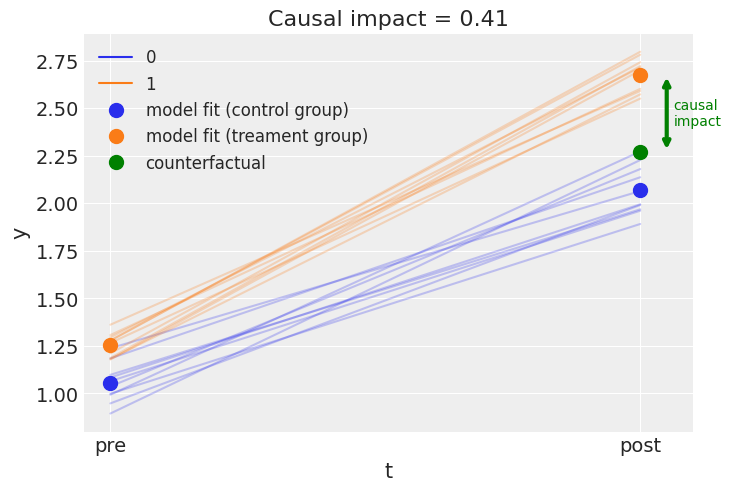

In [5]:
fig, ax = result.plot();